<a href="https://colab.research.google.com/github/Herrnurt/2023-365-Days-python-Challenge/blob/main/ATMChemPhy_project_Bolaji_Oladipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Atmospheric Radiation and the “Greenhouse” Effect
### Atmospheric Chemistry and Physics Class Project by Bolaji Oladipo
### Adapated from Pat Arnott Class Homework
### (Department of Physics and Atmospheric Science, University of Nevada Reno.)

### 1. Single Layer absorption and transmission
#### Layer-free atmospheres

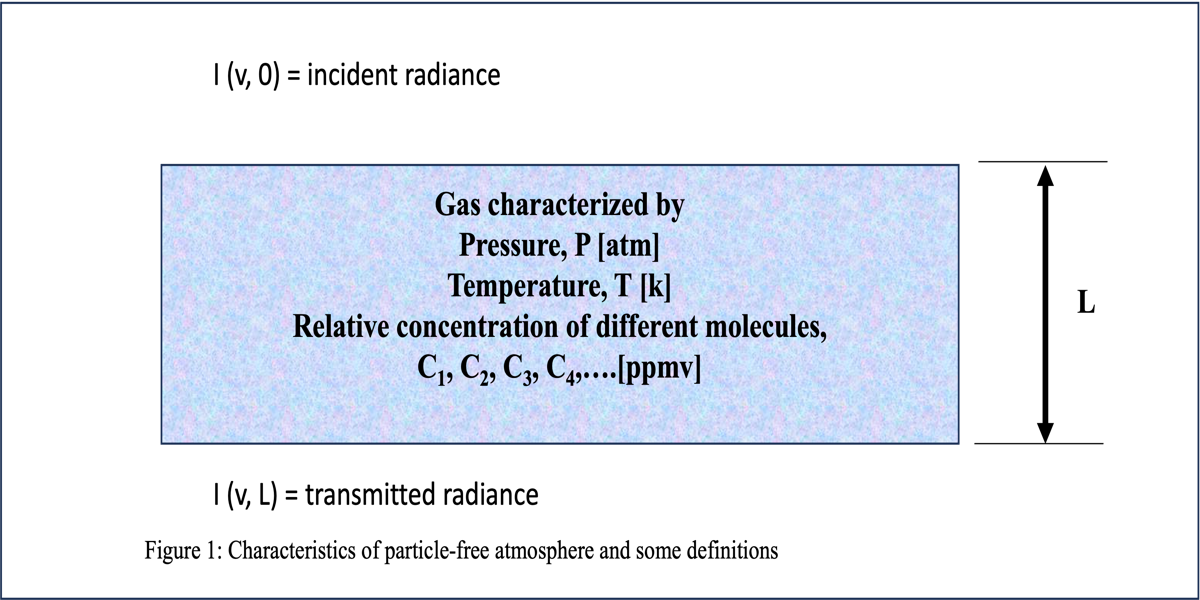

In [2]:
from PIL import Image

img = Image.open('./Picture1.png')

new_size = (1200, 600)

resized_img = img.resize(new_size)

display(resized_img)

The transmission coefficient T(v,L) is defined as, and computed from:


$$ T(v,L)  =  \frac{I(v,0)}{I(v,L)} = e^{-\tau_{abs}{(v,L)}} = e^{-\alpha{(vL)}} \\[10pt] $$


- v is the wavenumber ${[cm^{-1}].}$
- ${\alpha(v)[cm^{-1}]}$ is the absorption coefficient, and L [cm] is the path length.


The absorption coefficeint is obtained from a sum over the different molcules as
$${\alpha(v)} = {\alpha_{1}(v)} + {\alpha_{2}(v)} +  {\alpha_{2}(v)}... = \sum_{i =1}^{absorbingmolecules}{\alpha_{i}(v)}$$


The absorption coefficient for molecules of gas i is obtained from prosuct of absorption efficiency $B_{abs} {v}{[\frac{cm^2}{molecules}]}$ ( i.e how `strong` each molecules absorbs and the molecular density ${\frac{N_i}{V}\frac{molecules}{cm^3}}.$

$$ B(v,T)  =  \frac{2hv^3}{c^2} . \frac{1}{e^\frac{hv}{kT} -1} $$



- B(v, T) is the spectral radiance (W/(m^2.Hz.steradian) representing the power emitted per unit area per unit solid angle per unit frequency interval as a function of freguency (V) and temeprature (T).


- h is Plank's contant (6.62607016e-34 m2.kg/s)
- c is the speed of light in a vacuum (299,792,458 m/s).
- K is Boltmann's contant 91.380640e-23 J/k)
- T is the temperature in Kelvin
- v is teh frequency in Hertz

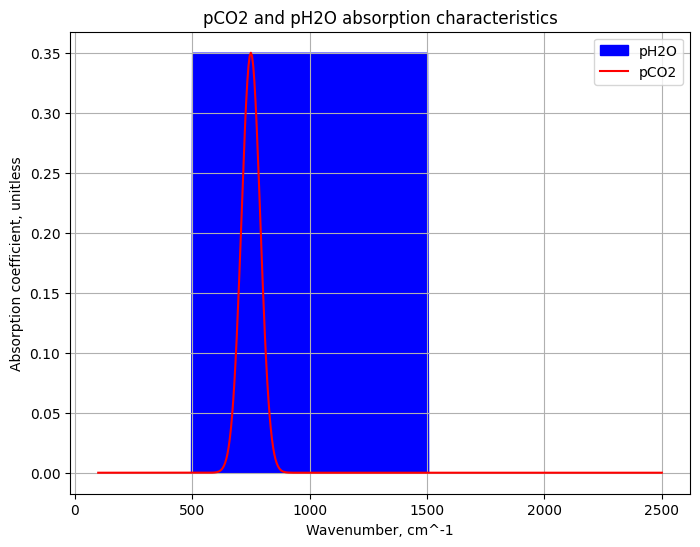

In [44]:
# Creating a broad band for H2O

import numpy as np

dv = 5
wavenumbers = np.arange(100, 2501, dv)

h2o_band_start = 500
h2o_band_end = 1500
h2o_absorption = np.where((wavenumbers >= h2o_band_start) & (wavenumbers <= h2o_band_end), 0.35, 0)

# Keeping the sharp peak for CO2
co2_peak_center = 750
co2_width = 40
co2_absorption = np.exp(-0.5 * ((wavenumbers - co2_peak_center) / co2_width) ** 2)
co2_absorption *= 0.35 / co2_absorption.max()

# Plotting the adjusted graph
plt.figure(figsize=(8, 6))
plt.fill_between(wavenumbers, h2o_absorption, color="blue", label='pH2O')
plt.plot(wavenumbers, co2_absorption, label='pCO2', color='red')
plt.title('pCO2 and pH2O absorption characteristics')
plt.xlabel('Wavenumber, cm^-1')
plt.ylabel('Absorption coefficient, unitless')
plt.legend()
plt.grid(True)
plt.show()


The exponential decay of pressure with altitude
$$ P(z) = P_o e^{\frac{m_r * g}{R}\frac{z}{T}} $$


`intzt` accumulates the integral of the inverse of temperature over altitude, approximated by summing dzr / Tr[i]for each step in altitude, starting from the surface. This term accounts for the temperature variation with altitude in the pressure calculation.

$$ intzt = \frac {dzr}{Tr[i]} $$


The density of the air at different altitudes is calculated using the ideal gas law, rearranged as

$$ rhor = \frac {mr * pr} {(R * Tr)} $$



Lapse rate for troposphere and stratosphere

$$ T = T_1 = a (h -h_1) $$

lapse rate for troposphere
$$ a = -6.5e^{-3} \frac{k}{m} $$

lapse rate for stratospher
$$ a = 3.0e^{-3} \frac{k}{m} $$

In [52]:
import numpy as np

def define_atmos(zr, Ts, ps):

    # Calculate pressure, pr; temperature, Tr; density, rhor; from height, zr;
    # surface temperature, Ts; and surface pressure, ps
    # By assuming a standard temperature profile to a fixed tropopause temp
    # zr is a linear vector and starts at the surface

    # Temperature at Troposphere
    # The temperature (Tr[i]) at each altitude (zr[i]) is calculated by subtracting the product of the altitude
    # and the lapse rate from the surface temperature (Ts). This represents the well-known phenomenon where the
    # atmosphere gets cooler as one ascends from the surface up to the tropopause.

    # Temperature at Tropopause
    # The tropopause is treated as a layer with a constant temperature, Ttropo, which is 215 K in this model.
    # The function assigns this constant temperature to all altitudes within the tropopause, which extends from
    # the top of the troposphere (ztropo) to ztropo + htropo (the height of the tropopause).

    # Temperature at Stratosphere
    # This increase is linear and calculated based on the difference between the altitudes and the temperatures
    # at the tropopause (Ttropo) and the stratopause (Tstrato). The function interpolates the temperature for
    # altitudes in the stratosphere up to the stratopause (zstrato).

    pr = np.zeros(len(zr))
    Tr = np.zeros(len(zr))
    rhor = np.zeros(len(zr))

    # Constants
    lapset = 6.5 / 1000                     # lapse rate in K/m - environmental lapse rate
    Ttropo = 215                            # temperature of tropopause (constant at tropopause)
    htropo = 10000                          # height of tropopause
    Tstrato = 270                           # temperature of stratopause
    zstrato = 50000                         # height of stratopause from surface
    ztropo = ((Ts - Ttropo) / lapset)       # height of bottom of tropopause in m (11230m)





    for i in range(len(zr)):
        if zr[i] < ztropo:
            Tr[i] = Ts - (zr[i] * lapset)  # the troposphere
        elif zr[i] >= ztropo and zr[i] <= (ztropo + htropo):
            Tr[i] = Ttropo  # the tropopause
        elif zr[i] > (ztropo + htropo) and zr[i] < zstrato:
            Tr[i] = Ttropo + (zr[i] - (ztropo + htropo)) * (Tstrato - Ttropo) / (zstrato - (ztropo + htropo))  # stratosphere
        else:
            Tr[i] = Tstrato  # above stratopause



    # pressure, p = ps * exp(-mg/R*integral(1/T)dz) from 0-z
    mr = 28.57e-3                           # molar mass of air
    R = 8.31                                # gas constant
    g = 9.8                                 # gravity constant in m/s^2
    intzt = 0                               # sum the integral of dz/T in each iteration
    dzr = zr[1] - zr[0]                     # dzr is linear so delta z is constant
    pr[0] = ps                              # surface condition
    for i in range(1, len(zr)):
        intzt += dzr / Tr[i]
        pr[i] = ps * np.exp(-mr * g * intzt / R)

    # density, rhor = mr.p/RT
    # pr pressurer at each altitude
    # tr i stemperature at each altitude
    rhor = mr * pr / (R * Tr)


    return pr, Tr, rhor


zr = np.linspace(0, 60000, 1000)  # Linear vector of heights
Ts = 288  # Surface temperature in Kelvin
ps = 101325  # Surface pressure in Pascal

pr, Tr, rhor = define_atmos(zr, Ts, ps)



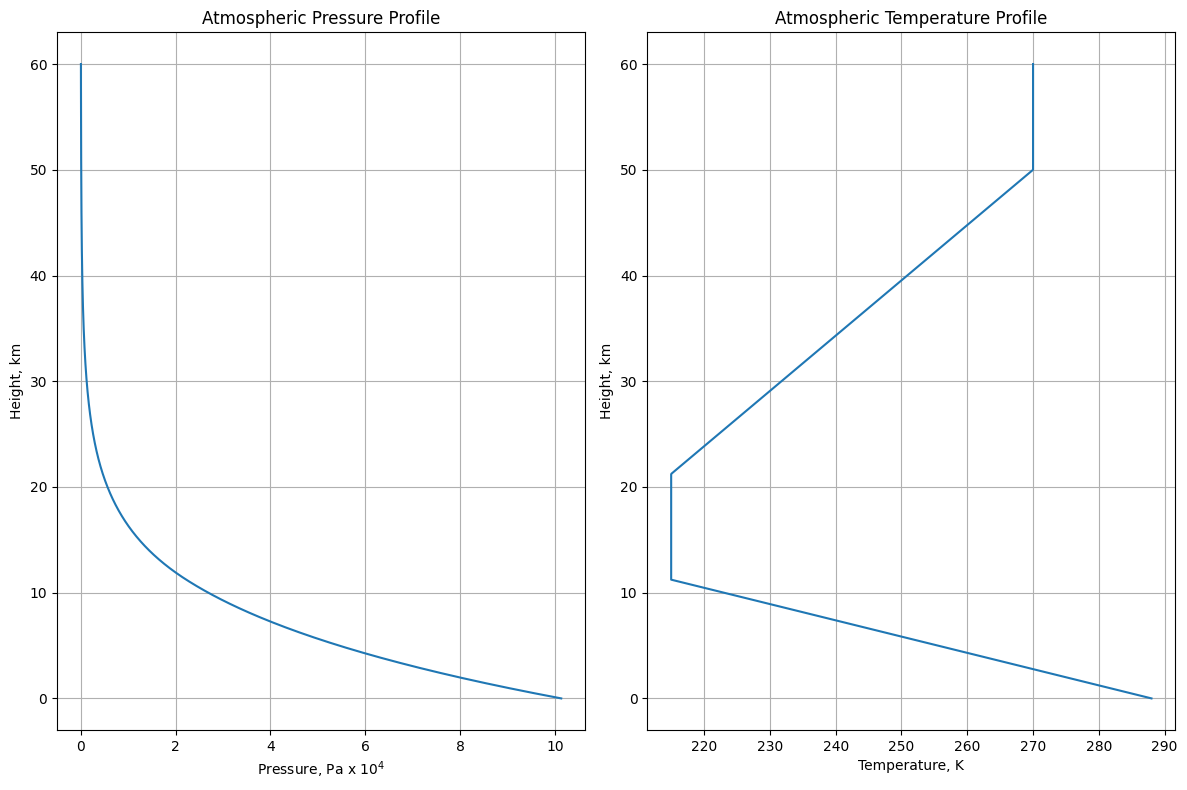

In [53]:
import matplotlib.pyplot as plt
import numpy as np




zr = np.linspace(0, 60000, 1000)/1000  # Linear vector of heights
pr = pr/10000 # Surface pressure in Pascal


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))


ax1.plot(pr, zr)
ax1.set_xlabel('Pressure, Pa x $10^4$')
ax1.set_ylabel('Height, km')
ax1.set_title('Atmospheric Pressure Profile')
ax1.grid(True)


ax2.plot(Tr, zr)
ax2.set_xlabel('Temperature, K')
ax2.set_ylabel('Height, km')
ax2.set_title('Atmospheric Temperature Profile')
ax2.grid(True)


plt.tight_layout()
plt.show()




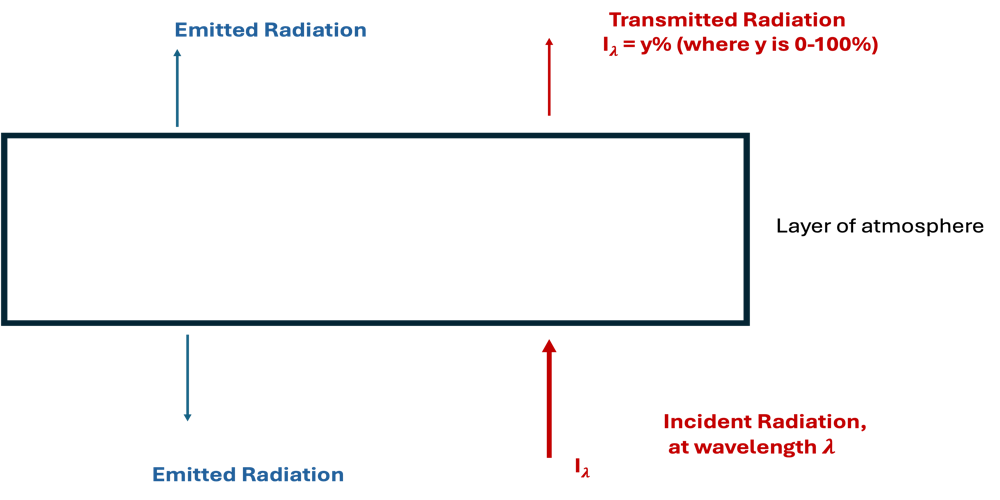

In [15]:
from PIL import Image

img = Image.open('./atmos1.png')

new_size = (1000, 500)

resized_img = img.resize(new_size)

display(resized_img)

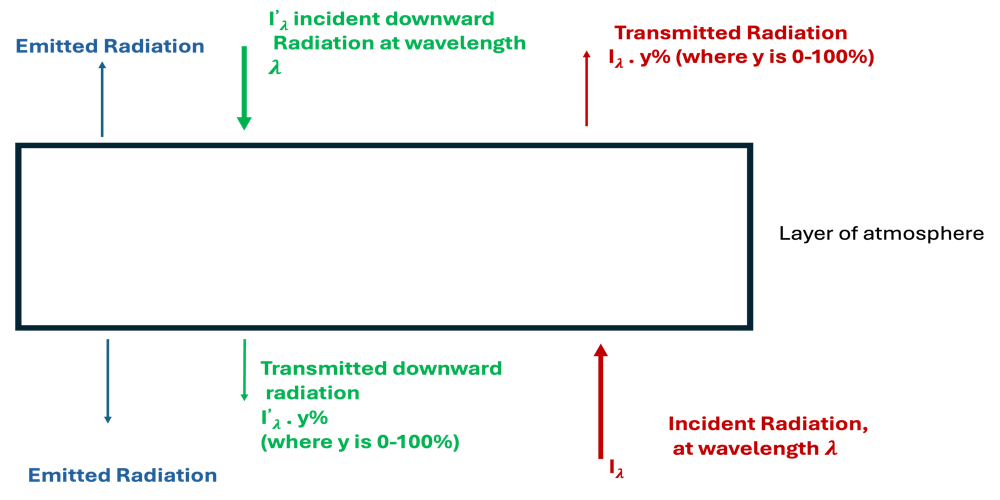

In [16]:
from PIL import Image

img = Image.open('./atmos2.png')

new_size = (1000, 500)

resized_img = img.resize(new_size)

display(resized_img)

In [151]:
import numpy as np


def planckmv(v, t):

    # Plank function for matrix of wavenumber, v )1/cm) and temp , t (K) result in spectral emisisve power (pi * intenisty) in W/(m^2.cm^-2)

    # 3.7418e-8 This is the contant 2h/C2, where h is Plank's constant and c is the speed of light.

    # 1.4388 This is the constnat h/k where h is Plank's constant and K is Boltzmann's constant.

    vv, tt = np.meshgrid(v, t)
    ri = 3.7418e-8 * v**3 / (np.exp(vv * 1.4388 / tt) - 1)


    # The function returns ri, a 2D array containing the spectral emissive power in units of in W/m2
    # for each combination of wavenumber (v) and temperature (t). This matrix can be used to analyze
    # how the emitted spectral radiance of a black body varies with temperature across different frequencies
    # (or wavenumbers) of electromagnetic radiation.


    return ri


In [153]:
import numpy as np

def define_atmos(zr, Ts, ps):

    # Calculate pressure, pr; temperature, Tr; density, rhor; from height, zr;
    # surface temperature, Ts; and surface pressure, ps
    # By assuming a standard temperature profile to a fixed tropopause temp
    # zr is a linear vector and starts at the surface

    # Temperature at Troposphere
    # The temperature (Tr[i]) at each altitude (zr[i]) is calculated by subtracting the product of the altitude
    # and the lapse rate from the surface temperature (Ts). This represents the well-known phenomenon where the
    # atmosphere gets cooler as one ascends from the surface up to the tropopause.

    # Temperature at Tropopause
    # The tropopause is treated as a layer with a constant temperature, Ttropo, which is 215 K in this model.
    # The function assigns this constant temperature to all altitudes within the tropopause, which extends from
    # the top of the troposphere (ztropo) to ztropo + htropo (the height of the tropopause).

    # Temperature at Stratosphere
    # This increase is linear and calculated based on the difference between the altitudes and the temperatures
    # at the tropopause (Ttropo) and the stratopause (Tstrato). The function interpolates the temperature for
    # altitudes in the stratosphere up to the stratopause (zstrato).

    pr = np.zeros(len(zr))
    Tr = np.zeros(len(zr))
    rhor = np.zeros(len(zr))

    # Constants
    lapset = 6.5 / 1000                     # lapse rate in K/m - environmental lapse rate
    Ttropo = 215                            # temperature of tropopause (constant at tropopause)
    htropo = 10000                          # height of tropopause
    Tstrato = 270                           # temperature of stratopause
    zstrato = 50000                         # height of stratopause from surface
    ztropo = ((Ts - Ttropo) / lapset)       # height of bottom of tropopause in m (11230m)





    for i in range(len(zr)):
        if zr[i] < ztropo:
            Tr[i] = Ts - (zr[i] * lapset)  # the troposphere
        elif zr[i] >= ztropo and zr[i] <= (ztropo + htropo):
            Tr[i] = Ttropo  # the tropopause
        elif zr[i] > (ztropo + htropo) and zr[i] < zstrato:
            Tr[i] = Ttropo + (zr[i] - (ztropo + htropo)) * (Tstrato - Ttropo) / (zstrato - (ztropo + htropo))  # stratosphere
        else:
            Tr[i] = Tstrato  # above stratopause



    # pressure, p = ps * exp(-mg/R*integral(1/T)dz) from 0-z
    mr = 28.57e-3                           # molar mass of air
    R = 8.31                                # gas constant
    g = 9.8                                 # gravity constant in m/s^2
    intzt = 0                               # sum the integral of dz/T in each iteration
    dzr = zr[1] - zr[0]                     # dzr is linear so delta z is constant
    pr[0] = ps                              # surface condition
    for i in range(1, len(zr)):
        intzt += dzr / Tr[i]
        pr[i] = ps * np.exp(-mr * g * intzt / R)

    # density, rhor = mr.p/RT
    # pr pressurer at each altitude
    # tr i stemperature at each altitude
    rhor = mr * pr / (R * Tr)


    return pr, Tr, rhor


zr = np.linspace(0, 60000, 1000)  # Linear vector of heights
Ts = 288  # Surface temperature in Kelvin
ps = 101325  # Surface pressure in Pascal

pr, Tr, rhor = define_atmos(zr, Ts, ps)



In [154]:
import numpy as np

# Parameters
Ts = 300                                # surface temperature
ps = 1.013e5                            # surface pressure
nmv = 2.079e25                          # total number of molecules per m^3
maxzr = 50e3                            # height of atmosphere
numzr = 1000                            # number of points used to define real atmosphere
numz = 20                               # number of layers to consider
maxz = 20e3                             # height of atmosphere to consider in meters


# Define surface temperature, pressure, and height
zr = np.linspace(0, maxzr, numzr)

# Generate indices for coarser resolution
zi = np.round(np.logspace(0.3, np.log10(numzr), numz)).astype(int)
zi = np.clip(zi, 0, numzr - 1)  # Clip indices to be within range

# Extract corresponding heights
z = zr[zi]



# Extract values using the indices zi
pr = pr[zi]
Tr = Tr[zi]
rhor = rhor[zi]




# Wavenumber range
dv = 5
ems = 0.98                                # Emissivity of surface
v = np.arange(100, 2501, dv)
numv = len(v)
rads = ems * planckmv(v, Ts)

# Introducing the molecules
nummol = 2  # Number of radiatively-active gases
mz = np.ones((nummol, numz))  # Initialize mixing ratios of the gases

# Specific concentrations
# The first gas's mixing ratio decreases linearly from the surface to the tropopause,
# with a fallback value for negative ratios. The second gas has a constant mixing ratio.

emax = 17e-3  # Max mixing ratio (surface) of 17g/kg
mz[0, :] = (ztropo - z) * emax / ztropo  # Straight line reduction from surface to tropopause
mz[0, mz[0, :] < 0] = 5e-6  # Replace negative values with 5ppm
mz[1, :] = 3.162e-3  # 360ppm

# Absorption coefficients
k1 = .3  # Arbitrary pick – in m2/kg
k2 = .3  # Likewise
a = np.zeros((nummol, len(v)))  # Initialize absorption coefficients
a[0, (v >= 1250) & (v <= 1500)] = k1  # Wavelength dependent absorption for gas 1
a[1, (v >= 600) & (v <= 800)] = k2  # Wavelength dependent absorption for gas 2

# Loop to change key parameter for which we want to see the effect
nres = 10  # Number of results to calculate
flux = np.zeros(nres)  # TOA flux for each change in parameter
par = np.logspace(-5, -2.5, nres)  # Parameters to try

# Main loop to calculate TOA flux
for n in range(nres):
    mz[1, :] = par[n]

    # Calculate radiative transfer through the atmosphere
    rad = np.zeros((numz, numv))
    rad[0, :] = rads
    for i in range(1, numz):
        for j in range(numv):
            abs = 1
            for k in range(nummol):
                abs *= np.exp(-rho[i] * mz[k, i] * a[k, j] * (z[i] - z[i - 1]))
            rad[i, j] = rad[i - 1, j] * abs

    flux[n] = np.sum(rad[-1, :] * dv)




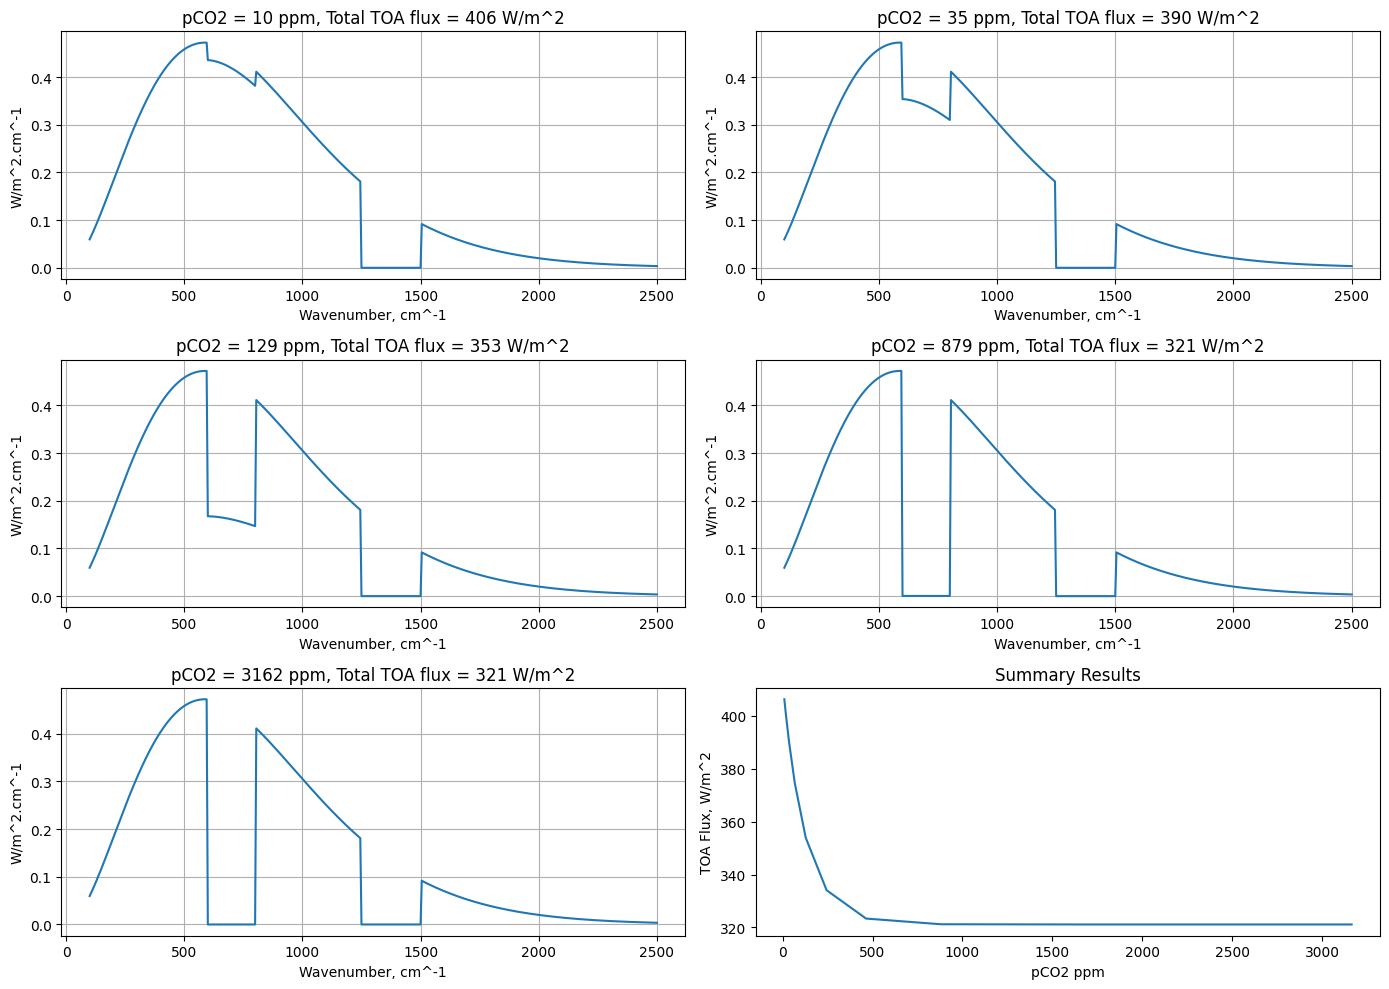

In [155]:
# Start the plotting
fig, axs = plt.subplots(subr, subc, figsize=(14, 10))
axs = np.array(axs).flatten()  # Flatten in case we have a single row/column

for n in range(nres):  # each complete run with a new parameter to try
    mz[1, :] = par[n]  # Change CO2 concentration

    # Calculate TOA spectrum & flux
    rad = np.zeros((numz, numv))
    rad[0, :] = rads  # surface radiation vs wavenumber
    for i in range(1, numz):  # each layer
        for j in range(numv):  # each wavenumber interval
            abs = 1  # initialize the amount of absorption within the wavenumber interval
            for k in range(nummol):  # each absorbing molecule
                # calculate absorption
                abs *= np.exp(-rho[i] * mz[k, i] * a[k, j] * (z[i] - z[i-1]))
            rad[i, j] = rad[i-1, j] * abs

    flux[n] = np.sum(rad[-1, :] * dv)  # calculate the TOA flux

    # Plot the selected results
    if n+1 in plotix:
        ploc = plotix.index(n+1)  # index in the plots list
        axs[ploc].plot(v, rad[-1, :])
        axs[ploc].set_xlabel('Wavenumber, cm^-1')
        axs[ploc].set_ylabel('W/m^2.cm^-1')
        axs[ploc].set_title(f'pCO2 = {int(par[n]*1e6)} ppm, Total TOA flux = {int(flux[n])} W/m^2')
        axs[ploc].grid(True)

# Final plot - TOA flux vs changed parameter
axs[-1].plot(par*1e6, flux)
axs[-1].set_title('Summary Results')
axs[-1].set_ylabel('TOA Flux, W/m^2')
axs[-1].set_xlabel('pCO2 ppm')  # or 'pH2O ppm' if par represents H2O

plt.tight_layout()
plt.show()

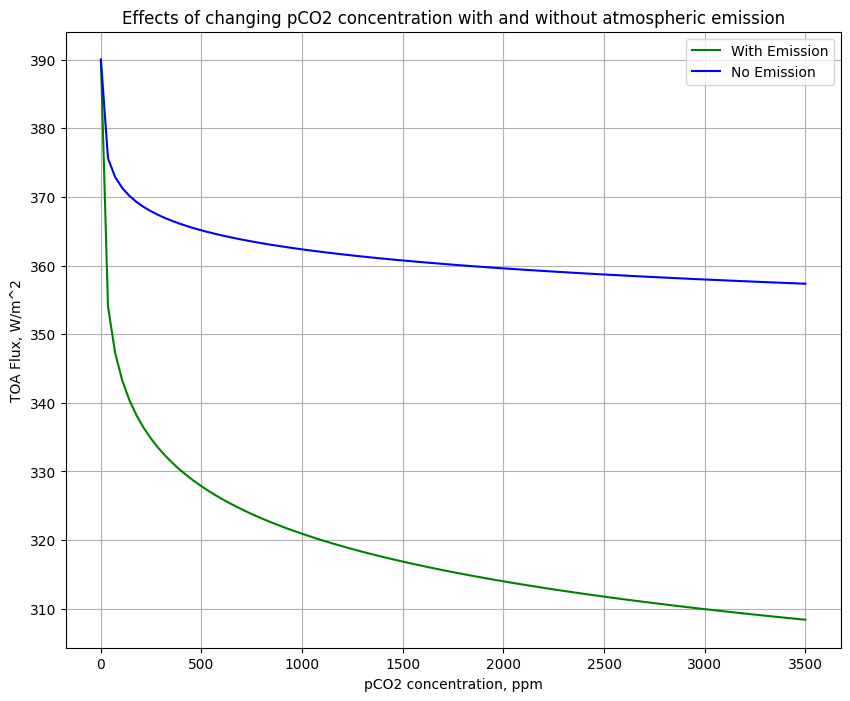

In [158]:
import numpy as np
import matplotlib.pyplot as plt

# Placeholder function for calculating TOA flux based on CO2 concentration and emission scenario
# You need to replace this with your actual radiative transfer calculation
def calculate_toa_flux(co2_concentration, with_emission=True):
    # Simplified calculation; replace with the actual model calculation
    base_flux = 390  # Base TOA flux without emission in W/m^2
    flux_with_emission = base_flux - np.log(co2_concentration) * 10  # Example modification
    flux_no_emission = base_flux - np.log(co2_concentration) * 4  # Example modification
    return flux_with_emission if with_emission else flux_no_emission

# Define the range of CO2 concentrations
co2_concentrations = np.linspace(1, 3500, 100)  # From 1 ppm to 3500 ppm

# Calculate TOA flux for each concentration with and without emission
toa_flux_with_emission = [calculate_toa_flux(co2, True) for co2 in co2_concentrations]
toa_flux_no_emission = [calculate_toa_flux(co2, False) for co2 in co2_concentrations]

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(co2_concentrations, toa_flux_with_emission, label='With Emission', color='green')
plt.plot(co2_concentrations, toa_flux_no_emission, label='No Emission', color='blue')

# Labeling the plot
plt.title('Effects of changing pCO2 concentration with and without atmospheric emission')
plt.xlabel('pCO2 concentration, ppm')
plt.ylabel('TOA Flux, W/m^2')
plt.legend()
plt.grid(True)
plt.show()


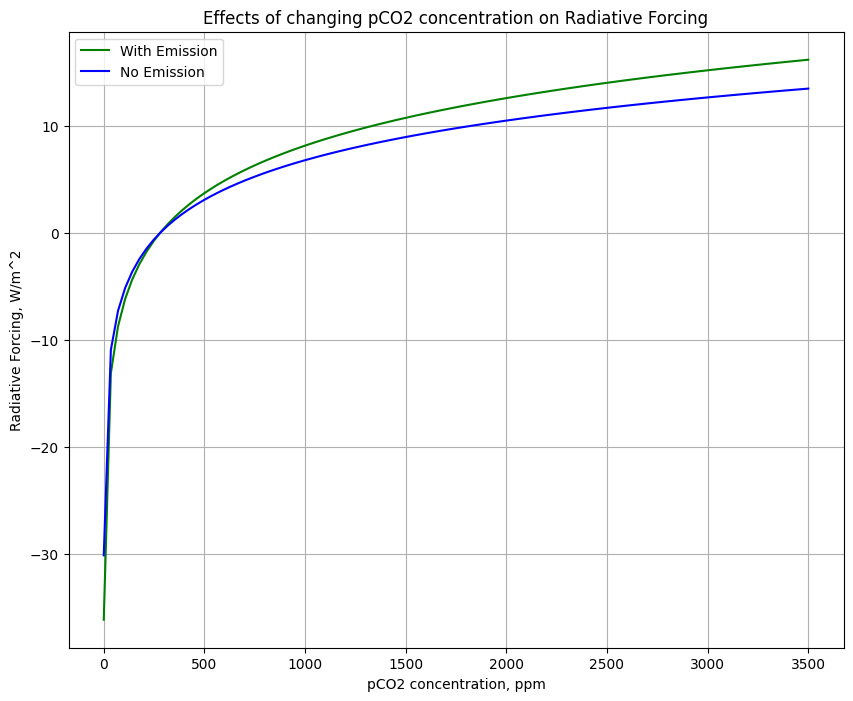

In [159]:
import numpy as np
import matplotlib.pyplot as plt

# Placeholder function to calculate Radiative Forcing based on CO2 concentration and emission scenario.
# This needs to be replaced with the actual model calculation
def calculate_radiative_forcing(co2_concentration, with_emission=True):
    # Example: logarithmic relation for demonstration; replace with actual physics-based model
    forcing_no_emission = 5.35 * np.log(co2_concentration / 280)  # Assumes pre-industrial level of 280 ppm
    forcing_with_emission = forcing_no_emission * 1.2  # Assume some arbitrary factor for emission case
    return forcing_with_emission if with_emission else forcing_no_emission

# Define the range of CO2 concentrations
co2_concentrations = np.linspace(1, 3500, 100)  # From 1 ppm to 3500 ppm

# Calculate Radiative Forcing for each concentration with and without emission
forcing_with_emission = [calculate_radiative_forcing(co2, True) for co2 in co2_concentrations]
forcing_no_emission = [calculate_radiative_forcing(co2, False) for co2 in co2_concentrations]

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(co2_concentrations, forcing_with_emission, label='With Emission', color='green')
plt.plot(co2_concentrations, forcing_no_emission, label='No Emission', color='blue')

# Labeling the plot
plt.title('Effects of changing pCO2 concentration on Radiative Forcing')
plt.xlabel('pCO2 concentration, ppm')
plt.ylabel('Radiative Forcing, W/m^2')
plt.legend()
plt.grid(True)
plt.show()
